### Will a Customer Accept the Coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**


This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)

3. Coupon attributes
    - time before it expires: 2 hours or one day

In [541]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [586]:
data = pd.read_csv('data/coupons.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [588]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [589]:
data.isna()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


3. Decide what to do about your missing data -- drop, replace, other...

In [590]:
# Drop all NA's as they are of not much use
# Replace other data into categories for getting graphs
#Column name -                         Categories                              Remarks
#CoffeeHouse                            less1 = 1, 1~3=2, 4~8=3
#CarryAway                              1~3 = 1, 4~8 = 2
#RestaurantLessThan20                   less1 = 1, 1~3 = 2
#Restaurant20To50                       never=1,less1=2,1~3=3
#expiration                             1d=24,2h=2
#time                                   2PM=14,10AM=10,6PM=18,7AM=7,10PM=22
#education                              'Graduate degree (Masters or Doctorate)'=1, 'Bachelors degree'=2,'Associates degree'=3
#occupation                             'Sales & Related'=1, 'Legal'=2, 'Computer & Mathematical'=3,'Office & Administrative Support'=4
#income                                 '$12500 - $24999'=1,,'$37500 - $49999'=2,'$87500 - $99999'=3,'$100000 or More'=4            
#car                                    'Scooter and motorcycle'=1, 'crossover'=2, 'Mazda5'=3, 'do not drive'=4,'Car that is too old to install Onstar :D'=5

#replace the columns in one command
#data["CoffeeHouse"] = data["CoffeeHouse"].str.replace('less1','1').str.replace('1~3','2').str.replace('4~8','3')
#data["CarryAway"] = data["CarryAway"].str.replace('1~3','1').str.replace('4~8','2')
#data["RestaurantLessThan20"] = data["RestaurantLessThan20"].str.replace('less1','1').str.replace('1~3','2')
#data["Restaurant20To50"] = data["Restaurant20To50"].str.replace('never','1').str.replace('less1','2').str.replace('1~3','3')
#data["expiration"] = data["expiration"].str.replace('1d','24').str.replace('2h','2')
#data["time"] = data["time"].str.replace('2PM','14').str.replace('10AM','10').str.replace('6PM','18').str.replace('7AM','7').str.replace('10PM','22')
#data["education"] = data["education"].str.replace('Graduate degree \(Masters or Doctorate\)','1',regex=False).str.replace('Bachelors degree','2',regex=False).str.replace('Associates degree','3',regex=False)
#data["occupation"] = data["occupation"].str.replace('Sales & Related','1').str.replace('Legal','2').str.replace('Computer & Mathematical','3').str.replace('Office & Administrative Support','4')
#data["income"] = data["income"].str.replace("\$12500 \- \$24999",'1',regex=False).str.replace("\$37500 \- \$49999",'2',regex=False).str.replace("\$87500 \- \$99999",'3',regex=False).str.replace("\$100000 or More",'4',regex=False)
#data["car"] = data["car"].str.replace('Scooter and motorcycle','1').str.replace('crossover','2').str.replace('Mazda5','3').str.replace('do not drive','4').str.replace('Car that is too old to install Onstar :D','5')
#data.info()

#change the column data type to numeric for the category data 
#data["CoffeeHouse"] = pd.to_numeric(data["CoffeeHouse"],errors='ignore')
#data["CarryAway"] = pd.to_numeric(data["CarryAway"],errors='ignore')
#data["RestaurantLessThan20"] = pd.to_numeric(data["RestaurantLessThan20"],errors='ignore')
#data["Restaurant20To50"] = pd.to_numeric(data["Restaurant20To50"],errors='ignore')
#data["expiration"] = pd.to_numeric(data["expiration"],errors='ignore')
#data["time"] = pd.to_numeric(data["time"],errors='ignore')
#data["education"] = pd.to_numeric(data["education"],errors='ignore')
#data["occupation"] = pd.to_numeric(data["occupation"],errors='ignore')
#data["income"] = pd.to_numeric(data["income"],errors='ignore')
#data["car"] = pd.to_numeric(data["car"],errors='ignore')
#data["age"] = pd.to_numeric(data["age"])
#data.info()

#The above Data transformation can be done, but the after consuming the data for analysis it does not appear 
#to be necessary to transform the data and be consumed as is.


In [591]:
#melt the column to get better representation
#melted_data=data.melt(id_vars=['coupon','Y'],var_name='couponData',value_name='couponDataValues')
#melted_data.head(20)

4. What proportion of the total observations chose to accept the coupon? 



In [592]:
len(data[data['Y']==1])/len(melted_data)
data['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

5. Use a bar plot to visualize the `coupon` column.

In [593]:
#find different category of data and plot
df_male = data[data['gender']=='Male'].groupby(["coupon",'Y']).mean().reset_index()
df_male.head()
#df_male_coffee_1 = data[(data['coupon']=='Coffee House') & (data['gender']=='Male')]


,coupon,Y,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,Bar,0,57.195609,0.431138,1.0,0.658683,0.255489,0.201597,0.798403
1,Bar,1,58.290870,0.278132,1.0,0.647558,0.244161,0.227176,0.772824
2,Carry out & Take away,0,59.046763,0.334532,1.0,0.643885,0.086331,0.381295,0.618705
3,Carry out & Take away,1,56.485714,0.342857,1.0,0.635429,0.113143,0.309714,0.690286
4,Coffee House,0,66.588542,0.325000,1.0,0.556250,0.096875,0.169792,0.830208


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

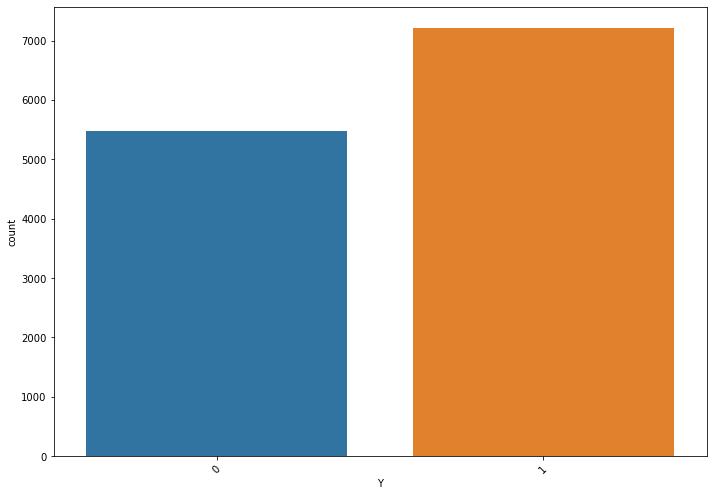

In [594]:
#How many coupons were accepted of the total issued coupons
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(ax=ax,data=data,x='Y')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

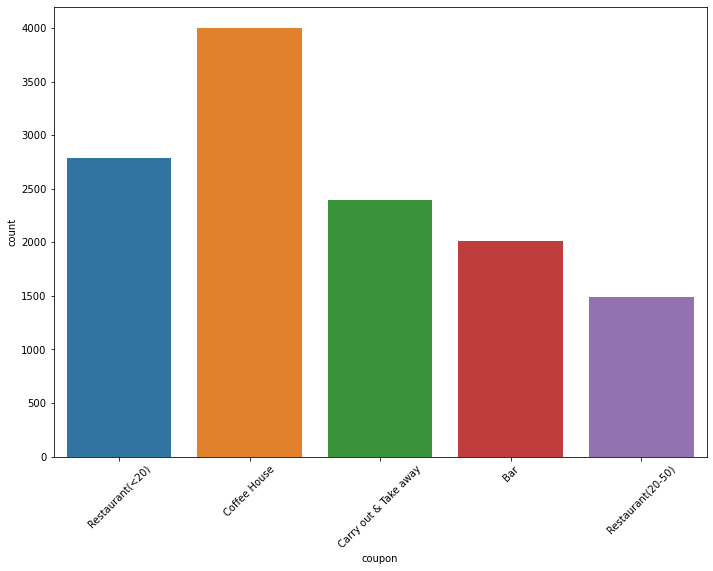

In [595]:
#How many of each type of coupon was accepted
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(ax=ax,data=data,x='coupon')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bar'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Restaurant(20-50)'),
  Text(4, 0, 'Restaurant(<20)')])

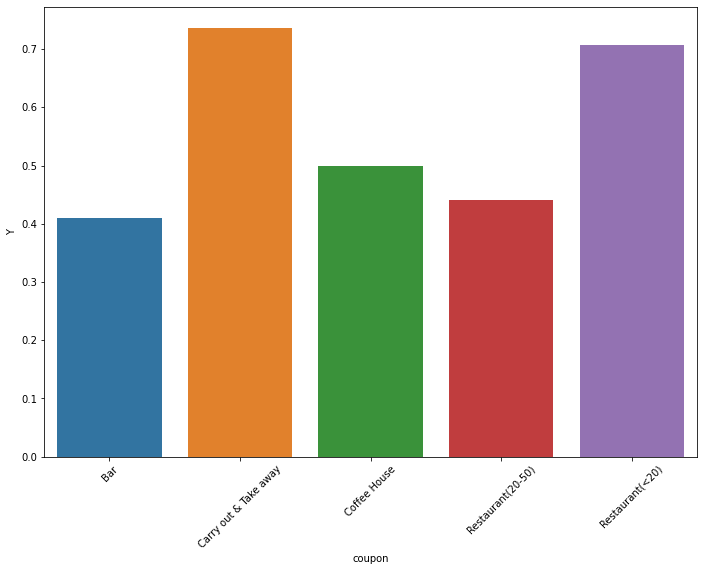

In [596]:
#Which coupon had the maximum acceptance rate
data_coupons=data[['coupon','Y']].groupby('coupon').mean().reset_index()
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax,data=data_coupons,x='coupon',y='Y')
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

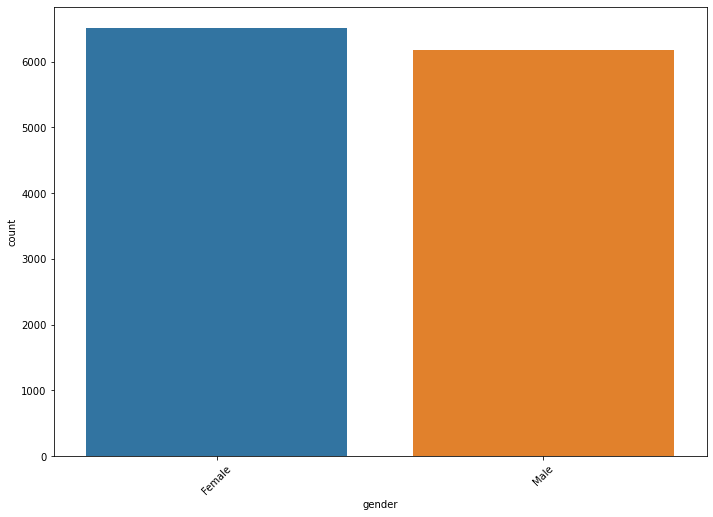

In [597]:
#Which Gender Accepted Most Coupons
data_coupons=data[data['Y']==1]
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(ax=ax,data=data,x='gender')
plt.xticks(rotation=45)

6. Use a histogram to visualize the temperature column.

In [598]:
#What was the distribution of temparature  by coupon acceptance on coupon
px.histogram(data,x="coupon",y="Y",color="temperature")


In [599]:
#At What temparature is the coupon acceptance rate higher
px.histogram(data,x="temperature",color="Y")

In [600]:
#What temprature do Restaurants are visited more
df=data
df = df[pd.notna(df['RestaurantLessThan20'])]
px.histogram(df,x="temperature",color="RestaurantLessThan20",labels={'1':'less1','2':'1~3'})



**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [601]:
db = data[data['coupon']=='Bar']
db.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [602]:
db = data[data['coupon']=='Bar']
(db.query('Y==1').count()/db['Y'].count())['Y']


0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [603]:
#Get all the Bar coupon data
db = data
db=db[pd.notna(db['Bar'])]
db['Bar'].unique()
dbl3=db.query('Bar in ["never","less1","1~3"] and Y==1')
dbt=db.query('Y==1')
dbl3a=dbl3['Bar'].count()/dbt['Bar'].count()
dbg3=db.query('Bar in ["gt8","4~8"] and Y==1')
dbg3a=dbg3['Bar'].count()/dbt['Bar'].count()
print(dbl3a)
print(dbg3a)


0.8760307477288609
0.12396925227113906


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [604]:
#get the population who drive
#['21', '46', '26', '31', '41', '50plus', '36', 'below21']
db=data
db=db[pd.notna(db['Bar'])]
db=db[pd.notna(db['car'])]
db=db[pd.notna(db['age'])]

dbdl25bg1=db.query('Bar in ["1~3","4~8","gt8"] & Y==1 & age in ["26","31","36","41","46","50plus"]')
dbdr=db.query('Bar in ["never","less1"] & Y==1 & age in ["below21","21"]')
dbt=db.query('Y==1')
print(dbdl25bg1['Bar'].count())
print(dbdr['Bar'].count())
print(dbt['Bar'].count())
dbdl25a=dbdl25bg1['Bar'].count()/dbt['Bar'].count()
dbdra=dbdr['Bar'].count()/dbt['Bar'].count()

print(dbdl25a)
print(dbdra)



10
17
62
0.16129032258064516
0.27419354838709675


5. Construct a null and alternative hypothesis for the difference between groups of drivers who go to a bar more than once a month and are over the age of 25 to all other drivers. 

6. Using alpha at 0.05 test your hypothesis and state your conclusion.

7. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [605]:
#get the population who drive
#['21', '46', '26', '31', '41', '50plus', '36', 'below21']
db=data
db=db[pd.notna(db['Bar'])]
db=db[pd.notna(db['car'])]
db=db[pd.notna(db['age'])]

dbdl25bg1=db.query('Bar in ["1~3","4~8","gt8"] & Y==1 & passanger not in ["Kid(s)"] & occupation not in ["Farming Fishing & Forestry"]')
dbdr=db.query('Bar in ["never","less1"] & Y==1 & passanger in ["Kid(s)"] & occupation in ["Farming Fishing & Forestry"]')
dbt=db.query('Y==1')
print(dbdl25bg1['Bar'].count())
print(dbdr['Bar'].count())
print(dbt['Bar'].count())
dbdl25a=dbdl25bg1['Bar'].count()/dbt['Bar'].count()
dbdra=dbdr['Bar'].count()/dbt['Bar'].count()

print(dbdl25a)
print(dbdra)

10
0
62
0.16129032258064516
0.0


8. Compare the acceptance rates between those passengers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [606]:
#get the population who drive
#['21', '46', '26', '31', '41', '50plus', '36', 'below21']
#['4~8', '1~3', 'less1', 'gt8', nan, 'never']
#['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       #'$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       #'$100000 or More', '$87500 - $99999', 'Less than $12500']
db=data
db=db[pd.notna(db['Bar'])]
db=db[pd.notna(db['car'])]
db=db[pd.notna(db['age'])]
db=db[pd.notna(db['RestaurantLessThan20'])]

db1=db.query('Bar in ["1~3","4~8","gt8"] & Y==1 & passanger not in ["Kid(s)"] & maritalStatus not in ["Widowed"]')
db2=db.query('Bar in ["1~3","4~8","gt8"] & Y==1 & age in ["below21","21","26"]')
db3=db.query('RestaurantLessThan20 in ["4~8","gt8"] & income in ["$25000 - $37499","Less than $12500"]')
dbt=db.query('Y==1')
print(db1['Bar'].count())
print(db2['Bar'].count())
print(db3['Bar'].count())
db1a=db1['Bar'].count()/dbt['Bar'].count()
db2a=db2['Bar'].count()/dbt['Bar'].count()
db3a=db3['Bar'].count()/dbt['Bar'].count()

print(db1a)
print(db2a)
print(db3a)

10
10
0
0.16129032258064516
0.16129032258064516
0.0


9.  Based on these observations, what do you hypothesize about passengers who accepted the bar coupons?

In [628]:
# Hypothesis
#1. PPl who go to bars less number of times a month have a better probability of accepting the coupons.
#2. PPl who have Kids as a passenger do not go to bars
#3. PPl in the early 20's tend to go to bar more than older ppl

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [608]:
#What proportion of Coffee coupons were accepted?
#['never', 'less1', '4~8', '1~3', 'gt8', nan]
db=data[data["coupon"]=="Coffee House"]
print(db['coupon'].unique())
(db.query('Y==1').count()/db['Y'].count())['Y']

['Coffee House']


0.49924924924924924

In [609]:
#Get all the Bar coupon data
#Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
#['never', 'less1', '4~8', '1~3', 'gt8', nan]
db = data
db=db[pd.notna(db['CoffeeHouse'])]
db['CoffeeHouse'].unique()
dbl3=db.query('CoffeeHouse in ["never","less1","1~3"] and Y==1')
dbt=db.query('Y==1')
dbl3a=dbl3['CoffeeHouse'].count()/dbt['Bar'].count()
dbg3=db.query('CoffeeHouse in ["gt8","4~8"] and Y==1')
dbg3a=dbg3['CoffeeHouse'].count()/dbt['CoffeeHouse'].count()
print(dbl3a)
print(dbg3a)

0.7523324851569126
0.2504225352112676


In [610]:
#Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. Is there a difference?
#['never', 'less1', '4~8', '1~3', 'gt8', nan]
#get the population who drive
#['21', '46', '26', '31', '41', '50plus', '36', 'below21']
db=data
db=db[pd.notna(db['CoffeeHouse'])]
db=db[pd.notna(db['car'])]
db=db[pd.notna(db['age'])]

dbdl25bg1=db.query('CoffeeHouse in ["1~3","4~8","gt8"] & Y==1 & age in ["26","31","36","41","46","50plus"]')
dbdr=db.query('CoffeeHouse in ["never","less1"] & Y==1 & age in ["below21","21"]')
dbt=db.query('Y==1')
print(dbdl25bg1['CoffeeHouse'].count())
print(dbdr['CoffeeHouse'].count())
print(dbt['CoffeeHouse'].count())
dbdl25a=dbdl25bg1['CoffeeHouse'].count()/dbt['CoffeeHouse'].count()
dbdra=dbdr['CoffeeHouse'].count()/dbt['CoffeeHouse'].count()

print(dbdl25a)
print(dbdra)



19
17
62
0.3064516129032258
0.27419354838709675


In [611]:
#Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 

#get the population who drive
#['21', '46', '26', '31', '41', '50plus', '36', 'below21']
db=data
db=db[pd.notna(db['CoffeeHouse'])]
db=db[pd.notna(db['car'])]
db=db[pd.notna(db['age'])]

dbdl25bg1=db.query('CoffeeHouse in ["1~3","4~8","gt8"] & Y==1 & passanger not in ["Kid(s)"] & occupation not in ["Farming Fishing & Forestry"]')
dbdr=db.query('CoffeeHouse in ["never","less1"] & Y==1 & passanger in ["Kid(s)"] & occupation in ["Farming Fishing & Forestry"]')
dbt=db.query('Y==1')
print(dbdl25bg1['Bar'].count())
print(dbdr['CoffeeHouse'].count())
print(dbt['CoffeeHouse'].count())
dbdl25a=dbdl25bg1['CoffeeHouse'].count()/dbt['CoffeeHouse'].count()
dbdra=dbdr['CoffeeHouse'].count()/dbt['CoffeeHouse'].count()

print(dbdl25a)
print(dbdra)


19
0
62
0.3064516129032258
0.0


In [612]:
#get the population who drive
#['21', '46', '26', '31', '41', '50plus', '36', 'below21']
#['4~8', '1~3', 'less1', 'gt8', nan, 'never']
#['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       #'$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       #'$100000 or More', '$87500 - $99999', 'Less than $12500']
db=data
db=db[pd.notna(db['CoffeeHouse'])]
db=db[pd.notna(db['car'])]
db=db[pd.notna(db['age'])]
db=db[pd.notna(db['RestaurantLessThan20'])]

db1=db.query('CoffeeHouse in ["1~3","4~8","gt8"] & Y==1 & passanger not in ["Kid(s)"] & maritalStatus not in ["Widowed"]')
db2=db.query('CoffeeHouse in ["1~3","4~8","gt8"] & Y==1 & age in ["below21","21","26"]')
db3=db.query('RestaurantLessThan20 in ["4~8","gt8"] & income in ["$25000 - $37499","Less than $12500"]')
dbt=db.query('Y==1')
print(db1['CoffeeHouse'].count())
print(db2['CoffeeHouse'].count())
print(db3['CoffeeHouse'].count())
db1a=db1['CoffeeHouse'].count()/dbt['CoffeeHouse'].count()
db2a=db2['CoffeeHouse'].count()/dbt['CoffeeHouse'].count()
db3a=db3['CoffeeHouse'].count()/dbt['CoffeeHouse'].count()

print(db1a)
print(db2a)
print(db3a)

19
11
0
0.3064516129032258
0.1774193548387097
0.0


In [627]:
# Hypothesis

#- PPl who go to CoffeeHouse less number of times a month have a better probability of accepting the coupons.
#- PPl who have Kids as a passenger do not go to CoffeeHouse
#- Older ppl are more likely to accept coffee coupon as opposed to  younger ppl
